In [2]:
import numpy as np
import matplotlib.pyplot as pyp
import matplotlib.colors as colors
import os
import corner
import pandas as pd
import matplotlib.ticker as ticker
from scipy.stats import kde

%matplotlib inline

In [3]:
pyp.style.use('seaborn-talk')
pyp.rcParams['font.size']=24

In [4]:
print os.environ['TAU_ACC_DET_DIR']
print os.environ['TAU_DIR']

/u/project/bern/swissel/nutau/det_files
/u/project/bern/swissel/nutau


In [5]:
def plot_anita_askaryan(color=None, linestyle=None, label=None, livetime=1., linewidth=1):
    # ANITA 3
    #log_en = np.array([18, 18.5, 19, 19.5, 20, 20.5, 21] )
    #acc    = np.array([0.00038, 0.016, 0.31, 2.5, 14, 46, 109])
    
    # ANITA 1-3 arithmetric mean of the acceptances
    # this is withouth ANITA-3 phi-masking
    acc = np.array([0.000650113,0.0422439,0.714553,5.38822,28.5557,84.6445,202.407])
    # this is with ANITA-3 with phi-masking
    #acc = np.array([0.000373656,0.0273364,0.563105,4.55475,24.8859,75.5364,184.24])
    log_en = np.array([18., 18.5, 19, 19.5, 20, 20.5, 21])
    
    # ANITA nu tau ratio from icemc
    nutau_ratio = np.array([6.45E-02, 4.41E-02,3.02E-01,3.36E-01,3.11E-01,3.50E-01, 3.62E-01])
    
    if( label == None):
        label = r"Mean ANITA I,II,III $\nu_{\tau}$ Askaryan"
    pyp.loglog(pow(10,log_en), acc*nutau_ratio*livetime*1e10, 
                 color=color, linestyle=linestyle, label=label, linewidth=linewidth)
    
def plot_anita_askaryan_exposture(color=None, linestyle=None, label=None, linewidth=1.0):
    # ANITA 3
    #log_en = np.array([18, 18.5, 19, 19.5, 20, 20.5, 21] )
    #acc    = np.array([0.00038, 0.016, 0.31, 2.5, 14, 46, 109])
    
    # ANITA 1-3 summed exposure, not including analysis efficiencies
    log_en = np.array([18., 18.5, 19, 19.5, 20, 20.5, 21])
    exp = np.array([2097.6,171241,3.42197e+06,2.6872e+07,1.46763e+08,4.44252e+08,1.07933e+09])
    
    # ANITA nu tau ratio from icemc
    nutau_ratio = np.array([6.45E-02, 4.41E-02,3.02E-01,3.36E-01,3.11E-01,3.50E-01, 3.62E-01])
    
    if( label == None):
        label = r"ANITA I-III $\nu_{\tau}$ Askaryan"
    pyp.loglog(pow(10,log_en), exp*nurat_ratio*1e10, 
                 color=color, linestyle=linestyle, label=label, linewidth=linewidth)

In [6]:
def plot_auger_acceptance(color=None, linestyle=None, label=None, livetime=1., alpha=1.0, linewidth=1.0):
    df = pd.read_csv(os.environ['TAU_DIR']+"/nutau_acceptance/util/auger_tau_nu_exposure.csv", skiprows=1,names=[ "exposure_cm2_sr_s", "acceptance_cm2_sr", "","", ""])
    if( label == None):
        label = r"Auger $\nu_{\tau}$ ICRC 2017"
    pyp.loglog(df.index, df.acceptance_cm2_sr*livetime,
               linewidth=linewidth, alpha=alpha,color=color, linestyle=linestyle, label=label)
    
def plot_auger_acceptance_icrc2017(color=None, linestyle=None, label=None, livetime=1., alpha=1.0, linewidth=1.0):
    df = pd.read_csv(os.environ['TAU_DIR']+"/nutau_acceptance/util/auger_icrc2017_earthskimming_exposure.csv",
                     skiprows=1,usecols=[0,1,10],names=[ "energy", "exposure_cm2_sr_s", "acceptance_km2_sr"])
    if( label == None):
        label = r"Auger $\nu_{\tau}$ ICRC 2017"
    pyp.plot(df.energy, df.acceptance_km2_sr*livetime*1e10,
               linewidth=linewidth, alpha=alpha,color=color, linestyle=linestyle, label=label)

In [7]:
def plot_icecube_acceptance(color=None, linewidth=1.0, linestyle=None, label=None, livetime=1., alpha=1.0):
    df = pd.read_csv(os.environ['TAU_DIR']+"/nutau_acceptance/util/icecube_acceptance.csv", 
                 skiprows=2,names=["sum_logenergy", "sum_exp_cm2srs", "sum_acceptance_km2sr",
                                   "nue_logenergy", "nue_exp_cm2srs", "nue_acceptance_km2sr",
                                   "numu_logenergy", "numu_exp_cm2srs", "numu_acceptance_km2sr",
                                   "nutau_logenergy", "nutau_exp_cm2srs", "nutau_acceptance_km2sr", "", ""])
    if( label == None):
        label = r"IceCube $\nu_{\tau}$ PRL 2016"
    pyp.loglog(pow(10,df.nutau_logenergy), df.nutau_acceptance_km2sr*livetime*1e10, 
               color=color, alpha=alpha,linestyle=linestyle, label=label, linewidth=linewidth)

In [8]:
def plot_icecube_doublebang_acceptance(color=None, linestyle=None, label=None, livetime=1.):
    df = pd.read_csv(os.environ['TAU_DIR']+"/nutau_acceptance/util/icecube_acceptance_double_bang.csv", 
                 skiprows=2,names=["nutau_energy", "nutau_effarea_m2", 
                                   "nutau_solidangle_sr", "nutau_acceptance_cm2sr", 
                                   "nutau_exposure_cm2srs", "", ""])
    print df.nutau_acceptance_cm2sr 
    print np.log10(df.nutau_energy)+9
    if( label == None):
        label = r"IceCube PRD 2016 $\nu_{\tau}$ Double Bang"
    pyp.loglog(df.nutau_energy*1e9, df.nutau_acceptance_cm2sr*livetime, color=color, linestyle=linestyle, label=label)

In [9]:
def read_det_acceptance_file(finame, en1, en2):
    fi = np.load(finame)
    A_Omega_start = fi['A_Omega_start']
    A_Omega_exit  = fi['A_Omega_exit']
    A_Omega_range = fi['A_Omega_range']
    A_Omega_trig  = fi['A_Omega_trig']
    log_energy = np.log10(en1*pow(10., en2))
    return A_Omega_start, A_Omega_exit, A_Omega_range, A_Omega_trig, log_energy

In [10]:
def plot_acceptance(altitude, ice_thick, f_Lo, BW, gain, nphased, decay_alt, label="", color=None, linestyle=None, livetime=1.):

    en1_list = [1,3]
    en2_list = np.arange(15, 22, 1)

    A_Omega_start_array = np.zeros([len(en1_list)*len(en2_list)-1])
    A_Omega_exit_array = np.zeros([len(en1_list)*len(en2_list)-1])
    A_Omega_range_array = np.zeros([len(en1_list)*len(en2_list)-1])
    A_Omega_trig_array = np.zeros([len(en1_list)*len(en2_list)-1])

    energy_array = []
    for i_en2, en2 in enumerate(en2_list):       
        for i_en1, en1 in enumerate(en1_list):  
            if( ~(en1==3 and en2==21)):
                energy_array.append(en1*pow(10.,en2))
    #print energy_array

    i_en = 0
    for i_en2, en2 in enumerate(en2_list):       

        for i_en1, en1 in enumerate(en1_list):         
            f_High = f_Lo + BW
            if( f_High > 1660 or (en1==3 and en2==21) ):
                continue
            else:
                #finame = os.environ['TAU_ACC_DET_DIR']+"/detector_acceptance_altitude_%d_km_2.0km_ice_lowCS_stdEL_%de+%d_eV_%d-%dMHz.npz"%(
                #  altitude, en1, en2, f_Lo, f_High)

                finame = os.environ['TAU_ACC_DET_DIR'] + "/anita/decay_" + str(decay_alt) + "km/detector_acceptance_altitude_%d_km_%1.1fkm_ice_midCS_stdEL_%de+%d_eV_%d-%dMHz_%2.1fdBi_%1.1fantennas.npz"%(
                    altitude,ice_thick,en1,en2,f_Lo,f_High,gain,nphased)
                #print finame
                #print np.log10(en1*pow(10.,en2)), en1, en2, i_en, A_Omega_trig
                A_Omega_start, A_Omega_exit, A_Omega_range, A_Omega_trig, log_energy = read_det_acceptance_file(finame, en1, en2)
                A_Omega_start_array[ i_en] = A_Omega_start
                A_Omega_exit_array[i_en] = A_Omega_exit
                A_Omega_range_array[ i_en] = A_Omega_range
                A_Omega_trig_array[ i_en] = A_Omega_trig
                #pyp.semilogy(np.log10(en1*pow(10.,en2)), A_Omega_trig, '.')
                #print np.log10(en1*pow(10,en2))
                if( en1 == 1 and en2 == 21):
                    print finame, A_Omega_start, A_Omega_exit, A_Omega_range, A_Omega_trig, log_energy, en1, en2, energy_array[i_en]
            i_en += 1
    if label == "":
        label='%d-%d MHz %2.1f dBi'%(f_Lo, f_Lo + BW, gain)
    
    pyp.loglog( energy_array, A_Omega_trig_array*livetime*1e10, label=label,color=color,linestyle=linestyle)

In [11]:
def plot_acceptance_multiparm(altitude, ice_thick, f_Lo, BW, gain, nphased, decay_alt, label="", color=None, linestyle=None, livetime=1.,
                             dirc="/anita/decay_parm/"):

    en1_list = [1,3]
    en2_list = np.arange(15, 22, 1)

    A_Omega_start_array = np.zeros([len(en1_list)*len(en2_list)-1])
    A_Omega_exit_array = np.zeros([len(en1_list)*len(en2_list)-1])
    A_Omega_range_array = np.zeros([len(en1_list)*len(en2_list)-1])
    A_Omega_trig_array = np.zeros([len(en1_list)*len(en2_list)-1])

    energy_array = []
    for i_en2, en2 in enumerate(en2_list):       
        for i_en1, en1 in enumerate(en1_list):  
            if( ~(en1==3 and en2==21)):
                energy_array.append(en1*pow(10.,en2))
    #print energy_array

    i_en = 0
    for i_en2, en2 in enumerate(en2_list):       

        for i_en1, en1 in enumerate(en1_list):         
            f_High = f_Lo + BW
            if( f_High > 1660 or (en1==3 and en2==21) ):
                continue
            else:
                #finame = os.environ['TAU_ACC_DET_DIR']+"/detector_acceptance_altitude_%d_km_2.0km_ice_lowCS_stdEL_%de+%d_eV_%d-%dMHz.npz"%(
                #  altitude, en1, en2, f_Lo, f_High)

                finame = os.environ['TAU_ACC_DET_DIR'] + dirc + "/detector_acceptance_altitude_%d_km_%1.1fkm_ice_midCS_stdEL_%de+%d_eV_%d-%dMHz_%2.1fdBi_%1.1fantennas.npz"%(
                    altitude,ice_thick,en1,en2,f_Lo,f_High,gain,nphased)
                #print finame
                #print np.log10(en1*pow(10.,en2)), en1, en2, i_en, A_Omega_trig
                A_Omega_start, A_Omega_exit, A_Omega_range, A_Omega_trig, log_energy = read_det_acceptance_file(finame, en1, en2)
                A_Omega_start_array[ i_en] = A_Omega_start
                A_Omega_exit_array[i_en] = A_Omega_exit
                A_Omega_range_array[ i_en] = A_Omega_range
                A_Omega_trig_array[ i_en] = A_Omega_trig
                #pyp.semilogy(np.log10(en1*pow(10.,en2)), A_Omega_trig, '.')
                #print np.log10(en1*pow(10,en2))
                if( en1 == 1 and en2 == 21):
                    print finame, A_Omega_start, A_Omega_exit, A_Omega_range, A_Omega_trig, log_energy, en1, en2, energy_array[i_en]
            i_en += 1
    if label == "":
        label='%d-%d MHz %2.1f dBi'%(f_Lo, f_Lo + BW, gain)
    
    pyp.loglog( energy_array, A_Omega_trig_array*livetime*1e10, label=label,color=color,linestyle=linestyle)

In [12]:
def find_nearest(array, values, lower_bound=None, upper_bound=None):
    # finds the nearest values in the arrays
    # if the values are outside the desire range, sets the index to -1
    values = np.atleast_1d(values)
    indices = np.abs(np.int64(np.subtract.outer(array, values))).argmin(0)
    out = array[indices]
    if( lower_bound != None):
        bound_ind = np.where(values < lower_bound)
        indices[bound_ind] = -1
    if( upper_bound != None):
        bound_ind = np.where(values > upper_bound)
        indices[bound_ind] = -1
    return indices



In [13]:
find_nearest(np.array([50, 55, 60, 65, 70, 75, 80, 85, 87, 89]), 45)

array([0])

In [14]:
def plot_acceptance_multiparm2d(altitude, ice_thick, f_Lo, BW, 
                                gain, nphased, decay_alt, label="", 
                                color=None, linestyle=None,alpha=None, livetime=1.,
                               dirc = "/anita/decay_zenith_parm/", a3phimasking=False):

    en1_list = [1,3]
    en2_list = np.arange(15, 22, 1)

    anita3_phimask_logen  = np.array([18, 18.5, 19, 19.5, 20, 20.5, 21])
    anita3_phimask_eff =    np.array([0.313058, 0.263607, 0.406598, 0.496359, 0.562547, 0.624839, 0.66609])
    
    A_Omega_start_array = np.zeros([len(en1_list)*len(en2_list)-1])
    A_Omega_exit_array = np.zeros([len(en1_list)*len(en2_list)-1])
    A_Omega_range_array = np.zeros([len(en1_list)*len(en2_list)-1])
    A_Omega_trig_array = np.zeros([len(en1_list)*len(en2_list)-1])

    energy_array = []
    for i_en2, en2 in enumerate(en2_list):       
        for i_en1, en1 in enumerate(en1_list):  
            if( ~(en1==3 and en2==21)):
                energy_array.append(en1*pow(10.,en2))
    #print energy_array

    i_en = 0
    for i_en2, en2 in enumerate(en2_list):       

        for i_en1, en1 in enumerate(en1_list):         
            f_High = f_Lo + BW
            if( f_High > 1660 or (en1==3 and en2==21) ):
                continue
            else:
                #finame = os.environ['TAU_ACC_DET_DIR']+"/detector_acceptance_altitude_%d_km_2.0km_ice_lowCS_stdEL_%de+%d_eV_%d-%dMHz.npz"%(
                #  altitude, en1, en2, f_Lo, f_High)

                finame = os.environ['TAU_ACC_DET_DIR'] + dirc +"/detector_acceptance_altitude_%d_km_%1.1fkm_ice_midCS_stdEL_%de+%d_eV_%d-%dMHz_%2.1fdBi_%1.1fantennas.npz"%(
                    altitude,ice_thick,en1,en2,f_Lo,f_High,gain,nphased)
                #print finame
                #print np.log10(en1*pow(10.,en2)), en1, en2, i_en, A_Omega_trig
                A_Omega_start, A_Omega_exit, A_Omega_range, A_Omega_trig, log_energy = read_det_acceptance_file(finame, en1, en2)
                A_Omega_start_array[ i_en] = A_Omega_start
                A_Omega_exit_array[i_en] = A_Omega_exit
                A_Omega_range_array[ i_en] = A_Omega_range
                
                if( a3phimasking):
                    # NOTE FOR Energies < 10^18 using the 10^18 phimask efficiency
                    # FOR Energies >10^21 use the highest value
                    ind = find_nearest(anita3_phimask_logen, np.log10(en1*pow(10., en2)))
                    phimask_eff = anita3_phimask_eff[ind]
                else:
                    phimask_eff = 1.0
                    
                A_Omega_trig_array[ i_en] = A_Omega_trig * phimask_eff    
                #pyp.semilogy(np.log10(en1*pow(10.,en2)), A_Omega_trig, '.')
                #print np.log10(en1*pow(10,en2))
                if( en1 == 1 and en2 == 21):
                    print finame, A_Omega_start, A_Omega_exit, A_Omega_range, A_Omega_trig, log_energy, en1, en2, energy_array[i_en]
            i_en += 1
    if label == "":
        label='%d-%d MHz %2.1f dBi'%(f_Lo, f_Lo + BW, gain)
    
    
    pyp.loglog( energy_array, A_Omega_trig_array*livetime*1e10, label=label,color=color,linestyle=linestyle,alpha=alpha)
    return energy_array, A_Omega_trig_array*livetime*1e10

In [15]:
def load_event_arrays_old(altitude = 37,ice_thick=3, en1 = 3, en2 = 17, f_Lo = 300, f_High= 700, 
                      gain = 10, nphased = 1,cross='mid',eloss='std',
                      dirc=os.environ['TAU_ACC_DET_DIR'] + "/anita/decay_zenith_parm/"):
    finame = dirc +  "/detector_acceptance_altitude_%d_km_%1.1fkm_ice_%sCS_%sEL_%de+%d_eV_%d-%dMHz_%2.1fdBi_%1.1fantennas.npz"%(
                    altitude,ice_thick,cross,eloss,en1,en2,f_Lo,f_High,gain,nphased)
    finame2 = dirc +  "/detector_acceptance_altitude_%d_km_%1.1fkm_ice_%sCS_%sEL_%de+%d_eV_%d-%dMHz_%2.1fdBi_%1.1fantennas_events.npz"%(
                    altitude,ice_thick,cross,eloss,en1,en2,f_Lo,f_High,gain,nphased)
   
    #finame = '/u/project/bern/swissel/nutau/nutau_acceptance/03_Detector/test.npz'
    #finame2 = '/u/project/bern/swissel/nutau/nutau_acceptance/03_Detector/test_events.npz'
    #print finame
    #print finame2
    fi = np.load(finame)
    fi2 = np.load(finame2)
    
    A_Omega_start = fi['A_Omega_start']
    A_Omega_exit  = fi['A_Omega_exit']
    A_Omega_range = fi['A_Omega_range']
    A_Omega_trig  = fi['A_Omega_trig']
    N_events_start =fi['N_events_start']
    triggered_events = fi2['triggered_events']
    #print A_Omega_trig, len(triggered_events)
    
    if( len(triggered_events) > 0):
        #print triggered_events
        log10_tau_energy = triggered_events[:,0]
        dist_exit_to_detector = triggered_events[:,1]
        X0_dist = triggered_events[:,2]
        dist_decay_to_detector = triggered_events[:,3]
        Peak_Voltage = triggered_events[:,4]
        exit_view_angle = triggered_events[:,5]
        decay_view_angle = triggered_events[:,6]
        zenith_angle = triggered_events[:,7]
        zenith_angle_decay = triggered_events[:,8]
        decay_altitude = triggered_events[:,9]
    else:
        return A_Omega_start, A_Omega_exit, A_Omega_range, A_Omega_trig, N_events_start, triggered_events,\
                None, None, None, None,\
                None, None, None, None, None, None
    
    return A_Omega_start, A_Omega_exit, A_Omega_range, A_Omega_trig, N_events_start, triggered_events,\
           log10_tau_energy, dist_exit_to_detector, X0_dist, dist_decay_to_detector,\
           Peak_Voltage, exit_view_angle, decay_view_angle, zenith_angle, zenith_angle_decay, decay_altitude
        
def load_event_arrays(altitude = 37,ice_thick=3, en1 = 3, en2 = 17, f_Lo = 300, f_High= 700, 
                      gain = 10, nphased = 1,cross='mid',eloss='std',
                      dirc=os.environ['TAU_ACC_DET_DIR'] + "/anita/anita-1/"):
    finame = dirc +  "/detector_acceptance_altitude_%d_km_%1.1fkm_ice_%sCS_%sEL_%de+%d_eV_%d-%dMHz_%2.1fdBi_%1.1fantennas.npz"%(
                    altitude,ice_thick,cross,eloss,en1,en2,f_Lo,f_High,gain,nphased)
    finame2 = dirc +  "/detector_acceptance_altitude_%d_km_%1.1fkm_ice_%sCS_%sEL_%de+%d_eV_%d-%dMHz_%2.1fdBi_%1.1fantennas_events.npz"%(
                    altitude,ice_thick,cross,eloss,en1,en2,f_Lo,f_High,gain,nphased)
   
    #finame = '/u/project/bern/swissel/nutau/nutau_acceptance/03_Detector/test.npz'
    #finame2 = '/u/project/bern/swissel/nutau/nutau_acceptance/03_Detector/test_events.npz'
    print finame
    print finame2
    fi = np.load(finame)
    fi2 = np.load(finame2)
    
    A_Omega_start = fi['A_Omega_start']
    A_Omega_exit  = fi['A_Omega_exit']
    A_Omega_range = fi['A_Omega_range']
    A_Omega_trig  = fi['A_Omega_trig']
    triggered_events = fi2['triggered_events']
    #print A_Omega_trig, len(triggered_events)
    
    #triggered_events.append(np.array( [ log10_tau_energy[k], dist_exit_to_detector[k], X0_dist[k], 
    # dist_decay_to_detector[k], Peak_Voltage[k], exit_view_angle[k]*180./np.pi, decay_view_angle[k]*180./np.pi,  
    # zenith_angle_exit[k]*180./np.pi,zenith_angle_decay[k]*180./np.pi, zenith_angle_geom[k]*180./np.pi, 
    # decay_altitude[k], P_LUT[k], P_range[k], P_det[k]]))
    
    if( len(triggered_events) > 0):
        #print triggered_events
        log10_tau_energy = triggered_events[:,0]
        dist_exit_to_detector = triggered_events[:,1]
        X0_dist = triggered_events[:,2]
        dist_decay_to_detector = triggered_events[:,3]
        Peak_Voltage = triggered_events[:,4]
        exit_view_angle = triggered_events[:,5]
        decay_view_angle = triggered_events[:,6]
        zenith_angle_exit = triggered_events[:,7]
        zenith_angle_decay = triggered_events[:,8]
        zenith_angle_geom = triggered_events[:,9]
        decay_altitude = triggered_events[:,10]
        P_LUT = triggered_events[:,11]
        P_range = triggered_events[:,12]
        P_det = triggered_events[:,13]
    else:
        return A_Omega_start, A_Omega_exit, A_Omega_range, A_Omega_trig, triggered_events,\
                None, None, None, None,\
                None, None, None, None, None, None,\
                None, None, None, None
    
    return A_Omega_start, A_Omega_exit, A_Omega_range, A_Omega_trig, triggered_events,\
           log10_tau_energy, dist_exit_to_detector, X0_dist, dist_decay_to_detector,\
           Peak_Voltage, exit_view_angle, decay_view_angle, zenith_angle_exit, zenith_angle_decay, zenith_angle_geom,\
           decay_altitude, P_LUT, P_range, P_det

In [16]:
def load_range_arrays(altitude = 37,ice_thick=3, en1 = 3, en2 = 17, f_Lo = 300, f_High= 700, 
                      gain = 10, nphased = 1,cross='mid',eloss='std',
                      dirc=os.environ['TAU_ACC_DET_DIR'] + "/anita/decay_zenith_parm/"):
    finame = dirc +  "/detector_acceptance_altitude_%d_km_%1.1fkm_ice_%sCS_%sEL_%de+%d_eV_%d-%dMHz_%2.1fdBi_%1.1fantennas.npz"%(
                    altitude,ice_thick,cross,eloss,en1,en2,f_Lo,f_High,gain,nphased)
    finame2 = dirc +  "/detector_acceptance_altitude_%d_km_%1.1fkm_ice_%sCS_%sEL_%de+%d_eV_%d-%dMHz_%2.1fdBi_%1.1fantennas_events.npz"%(
                    altitude,ice_thick,cross,eloss,en1,en2,f_Lo,f_High,gain,nphased)
   
    #finame = '/u/project/bern/swissel/nutau/nutau_acceptance/03_Detector/test.npz'
    #finame2 = '/u/project/bern/swissel/nutau/nutau_acceptance/03_Detector/test_events.npz'
    #print finame
    #print finame2
    fi = np.load(finame)
    fi2 = np.load(finame2)
    
    A_Omega_start = fi['A_Omega_start']
    A_Omega_exit  = fi['A_Omega_exit']
    A_Omega_range = fi['A_Omega_range']
    A_Omega_trig  = fi['A_Omega_trig']
    N_events_start = fi['N_events_start']
    ranged_events = fi2['ranged_events']
    #print A_Omega_trig, len(triggered_events)
    #log10_tau_energy[k], dist_exit_to_detector[k], X0_dist[k], dist_decay_to_detector[k], 
    #Peak_Voltage[k], exit_view_angle[k]*180./np.pi, decay_view_angle[k]*180./np.pi,  zenith_angle[k]*180./np.pi 
    if( len(ranged_events) > 0):
        #print triggered_events
        log10_tau_energy = ranged_events[:,0]
        dist_exit_to_detector = ranged_events[:,1]
        X0_dist = triggered_events[:,2]
        dist_decay_to_detector = ranged_events[:,3]
        Peak_Voltage = ranged_events[:,4]
        exit_view_angle = ranged_events[:,5]
        decay_view_angle = ranged_events[:,6]
        zenith_angle = ranged_events[:,7]

    else:
        return A_Omega_start, A_Omega_exit, A_Omega_range, A_Omega_trig, N_events_start, ranged_events,\
                None, None, None, None,\
                None, None, None, None
    
    return A_Omega_start, A_Omega_exit, A_Omega_range, A_Omega_trig, N_events_start, ranged_events,\
           log10_tau_energy, dist_exit_to_detector, X0_dist, dist_decay_to_detector,\
           Peak_Voltage, exit_view_angle, decay_view_angle, zenith_angle

In [17]:
ice_thick=2.0

/u/project/bern/swissel/nutau/det_files/anita/anita-1//detector_acceptance_altitude_37_km_2.0km_ice_midCS_stdEL_1e+15_eV_180-1200MHz_10.0dBi_1.0antennas.npz
/u/project/bern/swissel/nutau/det_files/anita/anita-1//detector_acceptance_altitude_37_km_2.0km_ice_midCS_stdEL_1e+15_eV_180-1200MHz_10.0dBi_1.0antennas_events.npz
$1 \times 10^{15}$ eV has no triggered events.
/u/project/bern/swissel/nutau/det_files/anita/anita-1//detector_acceptance_altitude_37_km_2.0km_ice_midCS_stdEL_3e+15_eV_180-1200MHz_10.0dBi_1.0antennas.npz
/u/project/bern/swissel/nutau/det_files/anita/anita-1//detector_acceptance_altitude_37_km_2.0km_ice_midCS_stdEL_3e+15_eV_180-1200MHz_10.0dBi_1.0antennas_events.npz
$3 \times 10^{15}$ eV has no triggered events.
/u/project/bern/swissel/nutau/det_files/anita/anita-1//detector_acceptance_altitude_37_km_2.0km_ice_midCS_stdEL_1e+16_eV_180-1200MHz_10.0dBi_1.0antennas.npz
/u/project/bern/swissel/nutau/det_files/anita/anita-1//detector_acceptance_altitude_37_km_2.0km_ice_midCS_s

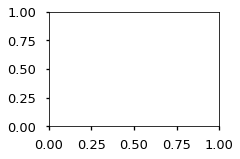

In [51]:
en1_list = [1,3]
en2_list = np.arange(15, 22, 1)
i_en = 0
for i_en2, en2 in enumerate(en2_list):       
    for i_en1, en1 in enumerate(en1_list): 
        try:
            A_Omega_start, A_Omega_exit, A_Omega_range, A_Omega_trig, triggered_events,\
            log10_tau_energy, dist_exit_to_detector, X0_dist, dist_decay_to_detector,\
            Peak_Voltage, exit_view_angle, decay_view_angle, zenith_angle,\
            zenith_angle_decay, decay_altitude \
        = load_event_arrays(altitude, ice_thick,en1=en1, en2=en2, f_Lo=180, f_High=1200, gain=10, nphased=1)
            
            pyp.subplot(3,3,1)
            pyp.hist(dist_decay_to_detector, label=r'$%d \times 10^{%d}$ eV'%(en1, en2))
            pyp.subplot(3,3,2)
            pyp.hist(np.log10(X0_dist))
            pyp.xlabel("Distance between Decay and Detector (km)")
        except ValueError:
            print r"$%d \times 10^{%d}$ eV has no triggered events."%(en1, en2)
        except:
            continue
pyp.subplot(3,3,1)
pyp.legend()

In [52]:
def plot_triggered_events(altitude = 37,ice_thick=3, en1 = 3, en2 = 17, f_Lo = 180, f_High= 1200, 
                      gain = 10, nphased = 1,
                          dirc=os.environ['TAU_ACC_DET_DIR'] + "/anita/anita-1/", old=False):
    if( old):
        A_Omega_start, A_Omega_exit, A_Omega_range, A_Omega_trig, triggered_events,\
                log10_tau_energy, dist_exit_to_detector, X0_dist, dist_decay_to_detector,\
                Peak_Voltage, exit_view_angle, decay_view_angle, zenith_angle, \
                zenith_angle_decay, decay_altitude\
            = load_event_arrays(altitude, ice_thick,en1=en1, en2=en2, f_Lo=f_Lo, f_High=f_High, gain=10, nphased=1, dirc=dirc)
    else:
         A_Omega_start, A_Omega_exit, A_Omega_range, A_Omega_trig, triggered_events,\
                log10_tau_energy, dist_exit_to_detector, X0_dist, dist_decay_to_detector,\
                Peak_Voltage, exit_view_angle, decay_view_angle, zenith_angle_exit, \
                zenith_angle_decay, zenith_angle_geom, decay_altitude,P_LUT, P_range, P_exit\
                = load_event_arrays(altitude, ice_thick,en1=en1, en2=en2, f_Lo=f_Lo, f_High=f_High, gain=10, nphased=1, dirc=dirc)
                
    pyp.subplot(2,4,1)
    pyp.hist(dist_decay_to_detector,30, label=r'$%d \times 10^{%d}$ eV'%(en1, en2), log=True, alpha=0.5)
    pyp.xlabel("Distance from Decay to Detector (km)")
    pyp.subplot(2,4,2)
    pyp.hist(X0_dist, 30,log=True,label=r'$%d \times 10^{%d}$ eV'%(en1, en2),alpha=0.5)
    pyp.xlabel("Distance from Exit Point to Decay (km)")
    pyp.subplot(2,4,3)
    pyp.hist(zenith_angle_exit, 30, log=True,label=r'$%d \times 10^{%d}$ eV'%(en1, en2),alpha=0.5)
    pyp.xlabel("Zenith Angle at Exit Point (deg.)")
    pyp.subplot(2,4,4)
    pyp.hist(zenith_angle_decay, 30, log=True,label=r'$%d \times 10^{%d}$ eV'%(en1, en2),alpha=0.5)
    pyp.xlabel("Zenith Angle at Decay Point (deg.)")
    pyp.subplot(2,4,5)
    pyp.hist(dist_exit_to_detector,30, label=r'$%d \times 10^{%d}$ eV'%(en1, en2), log=True, alpha=0.5)
    pyp.xlabel("Distance from Exit to Detector (km)")
    pyp.subplot(2,4,6)
    pyp.hist(decay_view_angle,30, log=True,label=r'$%d \times 10^{%d}$ eV'%(en1, en2),alpha=0.5)
    pyp.xlabel("View Angle at Decay (deg.)")
    pyp.subplot(2,4,7)
    pyp.hist(log10_tau_energy, log=True,label=r'$%d \times 10^{%d}$ eV'%(en1, en2),alpha=0.5)
    pyp.xlabel(r"log$_{10}(\tau$ energy (eV))")
    pyp.subplot(2,4,8)
    pyp.hist(decay_altitude,30, label=r'$%d \times 10^{%d}$ eV'%(en1, en2), log=True, alpha=0.5)
    pyp.xlabel("Decay Altitude (km)")
    pyp.subplots_adjust(hspace=0.5, wspace=0.4)

In [53]:
altitude = 37
pyp.figure(figsize=(18,8))
plot_triggered_events(altitude, ice_thick,en1=1, en2=20, f_Lo=180, f_High=1200, gain=10, nphased=1, old=True)
pyp.suptitle(r"$1\times10^{20}$ eV $\nu_{\tau}$")

/u/project/bern/swissel/nutau/det_files/anita/anita-1//detector_acceptance_altitude_37_km_2.0km_ice_midCS_stdEL_1e+20_eV_180-1200MHz_10.0dBi_1.0antennas.npz
/u/project/bern/swissel/nutau/det_files/anita/anita-1//detector_acceptance_altitude_37_km_2.0km_ice_midCS_stdEL_1e+20_eV_180-1200MHz_10.0dBi_1.0antennas_events.npz


ValueError: too many values to unpack

/u/project/bern/swissel/nutau/det_files/anita/anita-1//detector_acceptance_altitude_37_km_2.0km_ice_midCS_stdEL_1e+18_eV_180-1200MHz_10.0dBi_1.0antennas.npz
/u/project/bern/swissel/nutau/det_files/anita/anita-1//detector_acceptance_altitude_37_km_2.0km_ice_midCS_stdEL_1e+18_eV_180-1200MHz_10.0dBi_1.0antennas_events.npz


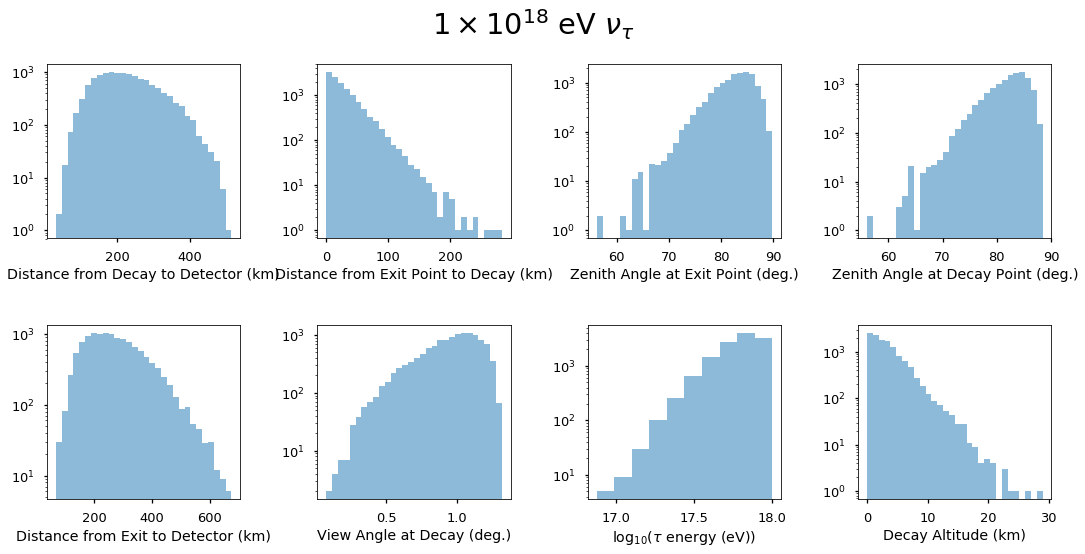

In [54]:
pyp.figure(figsize=(18,8))
plot_triggered_events(altitude, ice_thick,en1=1, en2=18, f_Lo=180, f_High=1200, gain=10, nphased=1)
pyp.suptitle(r"$1\times10^{18}$ eV $\nu_{\tau}$")

In [ ]:
pyp.figure(figsize=(18,8))
plot_triggered_events(altitude, ice_thick,en1=1, en2=20, f_Lo=180, f_High=1200, gain=10, nphased=1)
plot_triggered_events(altitude, ice_thick,en1=1, en2=18, f_Lo=180, f_High=1200, gain=10, nphased=1)
pyp.subplot(2,4,8)
pyp.legend()

pyp.suptitle(r"Parameterization for 10 decay altitudes and 10 zenith angles")

In [ ]:
def MAD(array):
    return np.median(np.abs(array - np.median(array)))

def get_mean_sigma(sorted_array, conf=0.68):
    N = len(sorted_array)
    k_conf = int(float(N) *(conf))
    k_init = range(0,N-k_conf)
    k_stop = range(k_conf, len(sorted_array))
    #print N, k_conf, len(k_init), len(k_stop)
    intervals = sorted_array[k_stop]-sorted_array[k_init]
    k1_conf = np.argmin(intervals)
    return sorted_array[k_init[k1_conf]], sorted_array[k_stop[k1_conf]]
    #return 0.5*(sorted_array[k1_68]+sorted_array[k1_68+k_stop[0]]), 0.5*(sorted_array[k1_68+k_stop[0]]- sorted_array[k1_68])

In [ ]:
def plot_triggered_events_energy(altitude = 37,ice_thick=4, f_Lo = 180, f_High= 1200, 
                      gain = 10, nphased = 1, which='anita1',cross='mid', eloss='std',
                      dirc=os.environ['TAU_ACC_DET_DIR'] + "/anita/decay_zenith_parm/"):
    
    energies = np.array([ 1.e17, 3.e17,  1.e18, 3.e18,  1.e19, 3.e19,    1.e20, 3.e20, 1.e21])
    
    e_good = np.zeros(len(energies))
    e_tau_mode = np.zeros(len(energies))
    e_tau_68_lo = np.zeros(len(energies))
    e_tau_68_hi = np.zeros(len(energies))
    e_tau_95_lo = np.zeros(len(energies))
    e_tau_95_hi = np.zeros(len(energies))
    
    em_angle_mode = np.zeros(len(energies))
    em_angle_68_lo = np.zeros(len(energies))
    em_angle_68_hi = np.zeros(len(energies))
    em_angle_95_lo = np.zeros(len(energies))
    em_angle_95_hi = np.zeros(len(energies))
    
    voltage_mode = np.zeros(len(energies))
    voltage_68_lo = np.zeros(len(energies))
    voltage_68_hi = np.zeros(len(energies))
    voltage_95_lo = np.zeros(len(energies))
    voltage_95_hi = np.zeros(len(energies))
    
    decay_alt_mode = np.zeros(len(energies))
    decay_alt_68_lo = np.zeros(len(energies))
    decay_alt_68_hi = np.zeros(len(energies))
    decay_alt_95_lo = np.zeros(len(energies))
    decay_alt_95_hi = np.zeros(len(energies))
    
    decay_view_mode = np.zeros(len(energies))
    decay_view_68_lo = np.zeros(len(energies))
    decay_view_68_hi = np.zeros(len(energies))
    decay_view_95_lo = np.zeros(len(energies))
    decay_view_95_hi = np.zeros(len(energies))
    
    X0_dist_mode = np.zeros(len(energies))
    X0_dist_68_lo = np.zeros(len(energies))
    X0_dist_68_hi = np.zeros(len(energies))
    X0_dist_95_lo = np.zeros(len(energies))
    X0_dist_95_hi = np.zeros(len(energies))
    
    dist_exit_mode = np.zeros(len(energies))
    dist_exit_68_lo = np.zeros(len(energies))
    dist_exit_68_hi = np.zeros(len(energies))
    dist_exit_95_lo = np.zeros(len(energies))
    dist_exit_95_hi = np.zeros(len(energies))
    
    dist_decay_mode = np.zeros(len(energies))
    dist_decay_68_lo = np.zeros(len(energies))
    dist_decay_68_hi = np.zeros(len(energies))
    dist_decay_95_lo = np.zeros(len(energies))
    dist_decay_95_hi = np.zeros(len(energies))
    
    for i,en in enumerate(energies):
        en2 = int(np.log10(en))
        en1 = int(pow(10, np.log10(en) - en2))
        
    
        try:
            A_Omega_start, A_Omega_exit, A_Omega_range, A_Omega_trig, triggered_events,\
                log10_tau_energy, dist_exit_to_detector, X0_dist, dist_decay_to_detector,\
                Peak_Voltage, exit_view_angle, decay_view_angle, zenith_angle, \
                zenith_angle_decay, decay_altitude\
                = load_event_arrays(altitude, ice_thick,en1=en1, en2=en2, f_Lo=f_Lo, f_High=f_High, 
                                    gain=10, nphased=1, dirc=dirc, cross=cross, eloss=eloss)
            if(triggered_events.size == 0): 
                continue
        except:
            print "\tException"
            continue
        
        e_good[i] = en
        e_tau_mode[i] = np.median(get_mean_sigma(np.sort(10**log10_tau_energy), conf=0.68))
        e_tau_68_lo[i], e_tau_68_hi[i] = get_mean_sigma(np.sort(10**log10_tau_energy), conf=0.68)
        e_tau_95_lo[i], e_tau_95_hi[i] = get_mean_sigma(np.sort(10**log10_tau_energy), conf=0.95)
        
        em_angle_mode[i] = np.median(get_mean_sigma(np.sort(90.-zenith_angle), conf=0.68))
        em_angle_68_lo[i], em_angle_68_hi[i] = get_mean_sigma(np.sort(90.-zenith_angle), conf=0.68)
        em_angle_95_lo[i], em_angle_95_hi[i] = get_mean_sigma(np.sort(90.-zenith_angle), conf=0.95)
    
        voltage_mode[i] = np.median(get_mean_sigma(np.sort(Peak_Voltage), conf=0.68))
        voltage_68_lo[i], voltage_68_hi[i] = get_mean_sigma(np.sort(Peak_Voltage), conf=0.68)
        voltage_95_lo[i], voltage_95_hi[i] = get_mean_sigma(np.sort(Peak_Voltage), conf=0.95)
    
        decay_alt_mode[i] = np.median(get_mean_sigma(np.sort(decay_altitude), conf=0.68))
        decay_alt_68_lo[i], decay_alt_68_hi[i] = get_mean_sigma(np.sort(decay_altitude), conf=0.68)
        decay_alt_95_lo[i], decay_alt_95_hi[i] = get_mean_sigma(np.sort(decay_altitude), conf=0.95)
        
        decay_view_mode[i] = np.median(get_mean_sigma(np.sort(decay_view_angle), conf=0.68))
        decay_view_68_lo[i], decay_view_68_hi[i] = get_mean_sigma(np.sort(decay_view_angle), conf=0.68)
        decay_view_95_lo[i], decay_view_95_hi[i] = get_mean_sigma(np.sort(decay_view_angle), conf=0.95)
        
        dist_decay_mode[i] = np.median(get_mean_sigma(np.sort(dist_decay_to_detector), conf=0.68))
        dist_decay_68_lo[i], dist_decay_68_hi[i] = get_mean_sigma(np.sort(dist_decay_to_detector), conf=0.68)
        dist_decay_95_lo[i], dist_decay_95_hi[i] = get_mean_sigma(np.sort(dist_decay_to_detector), conf=0.95)
        
        dist_exit_mode[i] = np.median(get_mean_sigma(np.sort(dist_exit_to_detector), conf=0.68))
        dist_exit_68_lo[i], dist_exit_68_hi[i] = get_mean_sigma(np.sort(dist_exit_to_detector), conf=0.68)
        dist_exit_95_lo[i], dist_exit_95_hi[i] = get_mean_sigma(np.sort(dist_exit_to_detector), conf=0.95)
        
        X0_dist_mode[i] = np.median(get_mean_sigma(np.sort(X0_dist), conf=0.68))
        X0_dist_68_lo[i], X0_dist_68_hi[i] = get_mean_sigma(np.sort(X0_dist), conf=0.68)
        X0_dist_95_lo[i], X0_dist_95_hi[i] = get_mean_sigma(np.sort(X0_dist), conf=0.95)
        
        
    # Decay Altitude Plot
  
    pyp.figure(figsize=(18,8))
    pyp.subplot(241)
    pyp.subplots_adjust(wspace=0.6)
    
    pyp.semilogx(e_good, decay_alt_mode, 'ro-', lw=3)
    pyp.fill_between(e_good, decay_alt_68_lo, decay_alt_68_hi, facecolor='b', alpha=0.5)
    pyp.fill_between(e_good, decay_alt_95_lo, decay_alt_95_hi, facecolor='b', alpha=0.45)
    pyp.xlim(1e17,1e21)
    pyp.xlabel('Neutrino Energy (eV)')
    pyp.ylabel('Decay Altitude (km)')
    pyp.grid(True,which='both', color='gray', alpha=0.2)
    '''pyp.plot(log10_tau_energy, 90.-zenith_angle, '.')
    pyp.xlabel('log10 ( Tau Exit Energy / eV )')
    pyp.ylabel('Tau Emergence Angle, deg')
    pyp.grid(True)
    pyp.xlim(16.,21.)
    pyp.ylim(0.,40.)'''
    
    # Emergence Angle Plot
    pyp.subplot(242)
    pyp.subplots_adjust(hspace=0.4)
    pyp.semilogx(e_good, em_angle_mode, 'ro-', lw=3)
    pyp.fill_between(e_good, em_angle_68_lo, em_angle_68_hi, facecolor='b', alpha=0.5)
    pyp.fill_between(e_good, em_angle_95_lo, em_angle_95_hi, facecolor='b', alpha=0.45)
    
    if( which == 'anita1'):
        pyp.hlines([25.8, 27.8], 1e17,1e21,colors='k', linestyles='--', alpha=0.6)
        pyp.hlines([26.8],1e17,1e21, colors='k', linestyles='-', lw=2, alpha=0.8)
    elif(which=='anita3'):
        pyp.hlines([33.6, 35.6], 1e17,1e21,colors='k', linestyles='--', alpha=0.6)
        pyp.hlines([34.6],1e17,1e21, colors='k', linestyles='-', lw=2, alpha=0.8)
    
    pyp.xlim(1e17,1e21)
    pyp.xlabel('Neutrino Energy (eV)')
    pyp.ylabel('Emergence Angle (deg.)')
    pyp.grid(True,which='both', color='gray', alpha=0.2)
    
      # Tau Energy Plots
    pyp.subplot(243)

    pyp.loglog(e_good, e_tau_mode, 'ro-', lw=3)
    pyp.fill_between(e_good, e_tau_68_lo, e_tau_68_hi, facecolor='b', alpha=0.5)
    pyp.fill_between(e_good, e_tau_95_lo, e_tau_95_hi, facecolor='b', alpha=0.45)

    if(which == 'anita1'):
        pyp.plot([1e17,1e21], np.array([0.2e18, 0.2e18]), 'k--', alpha=0.6)
        pyp.plot([1e17,1e21], np.array([0.6e18, 0.6e18]), 'k-', lw=2, alpha=0.8)
        pyp.plot([1e17,1e21], np.array([1.0e18, 1.0e18]), 'k--', alpha=0.6)
    elif(which == 'anita3'):
        pyp.hlines([0.36e18, 0.86e18], 1e17,1e21, colors='k', linestyles='--', alpha=0.6)
        pyp.hlines([0.56e18], 1e17,1e21, colors='k', linestyles='-',lw=2, alpha=0.8)
    
    pyp.ylim(1e17,1e21)
    pyp.xlabel('Neutrino Energy (eV)')
    pyp.ylabel('Tau Exit Energy (eV)')
    pyp.grid(True,which='both', color='gray', alpha=0.2)
    
    # Voltage Plots
    pyp.subplot(244)
    pyp.semilogx(e_good, decay_view_mode, 'ro-', lw=3)
    pyp.fill_between(e_good, decay_view_68_lo, decay_view_68_hi, facecolor='b', alpha=0.5)
    pyp.fill_between(e_good, decay_view_95_lo, decay_view_95_hi, facecolor='b', alpha=0.45)
    #pyp.xlim(17,21)
    #pyp.ylim(17,21)
    #pyp.ylim(0,5)
    pyp.xlim(1e17,1e21)
    #pyp.plot([17,21], [143./2/1.4,143./2./1.4 ], 'k--')
    
    pyp.xlabel('Neutrino Energy (eV)')
    #pyp.ylabel('Peak Voltage ($\mu$V)')
    pyp.ylabel('Decay View Angle (deg.)')
    pyp.grid(True,which='both', color='gray', alpha=0.2)
    pyp.xlim(1e17,1e21)
    
    pyp.subplot(245)
    pyp.loglog(e_good, voltage_mode*1e6, 'ro-', lw=3)
    pyp.fill_between(e_good, voltage_68_lo*1e6, voltage_68_hi*1e6, facecolor='b', alpha=0.5)
    pyp.fill_between(e_good,voltage_95_lo*1e6, voltage_95_hi*1e6, facecolor='b', alpha=0.45)
    pyp.xlabel('Neutrino Energy (eV)')
    pyp.ylabel('Peak Voltage ($\mu$V)')
    pyp.grid(True,which='both', color='gray', alpha=0.2)
    pyp.xlim(1e17,1e21)
    
    pyp.subplot(246)
    pyp.loglog(e_good, dist_exit_mode, 'ro-', lw=3)
    pyp.fill_between(e_good, dist_exit_68_lo, dist_exit_68_hi, facecolor='b', alpha=0.5)
    pyp.fill_between(e_good,dist_exit_95_lo, dist_exit_95_hi, facecolor='b', alpha=0.45)
    pyp.xlabel('Neutrino Energy (eV)')
    pyp.ylabel('Dist. Exit to Detector (km)')
    pyp.grid(True,which='both', color='gray', alpha=0.2)
    pyp.xlim(1e17,1e21)
    
    pyp.subplot(247)
    pyp.loglog(e_good, dist_decay_mode, 'ro-', lw=3)
    pyp.fill_between(e_good, dist_decay_68_lo, dist_decay_68_hi, facecolor='b', alpha=0.5)
    pyp.fill_between(e_good,dist_decay_95_lo, dist_decay_95_hi, facecolor='b', alpha=0.45)
    pyp.xlabel('Neutrino Energy (eV)')
    pyp.ylabel('Dist. Decay to Detector (km)')
    pyp.grid(True,which='both', color='gray', alpha=0.2)
    pyp.xlim(1e17,1e21)
    
    pyp.subplot(248)
    pyp.loglog(e_good, X0_dist_mode, 'ro-', lw=3)
    pyp.fill_between(e_good, X0_dist_68_lo, X0_dist_68_hi, facecolor='b', alpha=0.5)
    pyp.fill_between(e_good,X0_dist_95_lo, X0_dist_95_hi, facecolor='b', alpha=0.45)
    pyp.xlabel('Neutrino Energy (eV)')
    pyp.ylabel('Dist. Exit to Decay (km)')
    pyp.grid(True,which='both', color='gray', alpha=0.2)
    pyp.xlim(1e17,1e21)
    
    ################
    pyp.figure(figsize=(12,4))
    pyp.subplot(131)
    pyp.subplots_adjust(wspace=0.4)
    pyp.semilogx(e_good, em_angle_mode, 'r.-', lw=3)
    pyp.fill_between(e_good, em_angle_68_lo, em_angle_68_hi, facecolor='b', alpha=0.5)
    pyp.fill_between(e_good, em_angle_95_lo, em_angle_95_hi, facecolor='b', alpha=0.45)
    
    if( which == 'anita1'):
        pyp.hlines([25.8, 27.8], 1e17,1e21,colors='k', linestyles='--', alpha=0.6)
        pyp.hlines([26.8],1e17,1e21, colors='k', linestyles='-', lw=2, alpha=0.8)
    elif(which=='anita3'):
        pyp.hlines([33.6, 35.6], 1e17,1e21,colors='k', linestyles='--', alpha=0.6)
        pyp.hlines([34.6],1e17,1e21, colors='k', linestyles='-', lw=2, alpha=0.8)
    
    pyp.xlim(1e17,1e21)
    pyp.xlabel('Tau Neutrino Energy (eV)')
    pyp.ylabel('Emergence Angle (deg.)')
    pyp.grid(True,which='both', color='gray', alpha=0.2)
    
      # Tau Energy Plots
    pyp.subplot(132)
    pyp.loglog(e_good, e_tau_mode, 'r.-', lw=3)
    pyp.fill_between(e_good, e_tau_68_lo, e_tau_68_hi, facecolor='b', alpha=0.5)
    pyp.fill_between(e_good, e_tau_95_lo, e_tau_95_hi, facecolor='b', alpha=0.45)

    if(which == 'anita1'):
        pyp.plot([1e17,1e21], np.array([0.2e18, 0.2e18]), 'k--', alpha=0.6)
        pyp.plot([1e17,1e21], np.array([0.6e18, 0.6e18]), 'k-', lw=2, alpha=0.8)
        pyp.plot([1e17,1e21], np.array([1.0e18, 1.0e18]), 'k--', alpha=0.6)
    elif(which == 'anita3'):
        pyp.hlines([0.36e18, 0.86e18], 1e17,1e21, colors='k', linestyles='--', alpha=0.6)
        pyp.hlines([0.56e18], 1e17,1e21, colors='k', linestyles='-',lw=2, alpha=0.8)

    pyp.xlim(1e17,1e21)
    #pyp.ylim(17,21)
    pyp.xlabel('Tau Neutrino Energy (eV)')
    pyp.ylabel('Tau Exit Energy (eV)')
    pyp.grid(True,which='both', color='gray', alpha=0.2)
    
    # Decay altitude Plots
    pyp.subplot(133)
    pyp.semilogx(e_good, decay_alt_mode, 'ro-', lw=3)
    pyp.fill_between(e_good, decay_alt_68_lo, decay_alt_68_hi, facecolor='b', alpha=0.5)
    pyp.fill_between(e_good, decay_alt_95_lo, decay_alt_95_hi, facecolor='b', alpha=0.45)
    pyp.xlim(1e17,1e21)
    pyp.xlabel('Tau Neutrino Energy (eV)')
    pyp.ylabel('Decay Altitude (km)')
    pyp.grid(True,which='both', color='gray', alpha=0.2)

In [ ]:
crosslabel={'low':'low', 'mid':'mid.', 'upp':'upp.'}
elosslabel={'std':"ALLM", 'low':"ASW"}

for ice_thick in [2.0,3.0,4.0]:
    for cross in crosslabel.keys():
        for eloss in elosslabel.keys():
            print "%d km ice, %s $\sigma$, %s energy loss"%(ice_thick, crosslabel[cross], elosslabel[eloss])
            plot_triggered_events_energy(dirc=os.environ['TAU_ACC_DET_DIR'] + "/anita/anita-1/", 
                                 ice_thick=ice_thick,cross=cross,eloss=eloss)
            pyp.subplot(1,3,2)
            pyp.title("%d km ice, %s $\sigma$, %s energy loss"%(ice_thick, crosslabel[cross], elosslabel[eloss]), fontsize=14)
            pyp.savefig(os.environ['TAU_DIR'] + "/plots/anita_triggered_%dkm_altitude_%1.1fkm_ice_%sCS_%sEL.pdf"%(altitude, ice_thick, cross, eloss),
               bbox_inches='tight')

In [ ]:
crosslabel={'low':'low', 'mid':'mid.', 'upp':'upp.'}
elosslabel={'std':"ALLM", 'low':"ASW"}

for ice_thick in [2.0, 3.0, 4.0]:
    for cross in crosslabel.keys():
        for eloss in elosslabel.keys():
            print "%d km ice, %s $\sigma$, %s energy loss"%(ice_thick, crosslabel[cross], elosslabel[eloss])
            plot_triggered_events_energy(dirc=os.environ['TAU_ACC_DET_DIR'] + "/anita/anita-3/", 
                                 ice_thick=ice_thick,cross=cross,eloss=eloss,which='anita3')
            pyp.subplot(1,3,2)
            pyp.title("%d km ice, %s $\sigma$, %s energy loss"%(ice_thick, crosslabel[cross], elosslabel[eloss]), fontsize=14)
            pyp.savefig(os.environ['TAU_DIR'] + "/plots/anita3_triggered_%dkm_altitude_%1.1fkm_ice_%sCS_%sEL.pdf"%(altitude, ice_thick, cross, eloss),
               bbox_inches='tight')

/u/project/bern/swissel/nutau/det_files/anita/anita-3//detector_acceptance_altitude_37_km_2.0km_ice_midCS_stdEL_1e+17_eV_180-1200MHz_10.0dBi_1.0antennas.npz
/u/project/bern/swissel/nutau/det_files/anita/anita-3//detector_acceptance_altitude_37_km_2.0km_ice_midCS_stdEL_1e+17_eV_180-1200MHz_10.0dBi_1.0antennas_events.npz
	Exception
/u/project/bern/swissel/nutau/det_files/anita/anita-3//detector_acceptance_altitude_37_km_2.0km_ice_midCS_stdEL_3e+17_eV_180-1200MHz_10.0dBi_1.0antennas.npz
/u/project/bern/swissel/nutau/det_files/anita/anita-3//detector_acceptance_altitude_37_km_2.0km_ice_midCS_stdEL_3e+17_eV_180-1200MHz_10.0dBi_1.0antennas_events.npz
	Exception
/u/project/bern/swissel/nutau/det_files/anita/anita-3//detector_acceptance_altitude_37_km_2.0km_ice_midCS_stdEL_1e+18_eV_180-1200MHz_10.0dBi_1.0antennas.npz
/u/project/bern/swissel/nutau/det_files/anita/anita-3//detector_acceptance_altitude_37_km_2.0km_ice_midCS_stdEL_1e+18_eV_180-1200MHz_10.0dBi_1.0antennas_events.npz
	Exception
/u/p

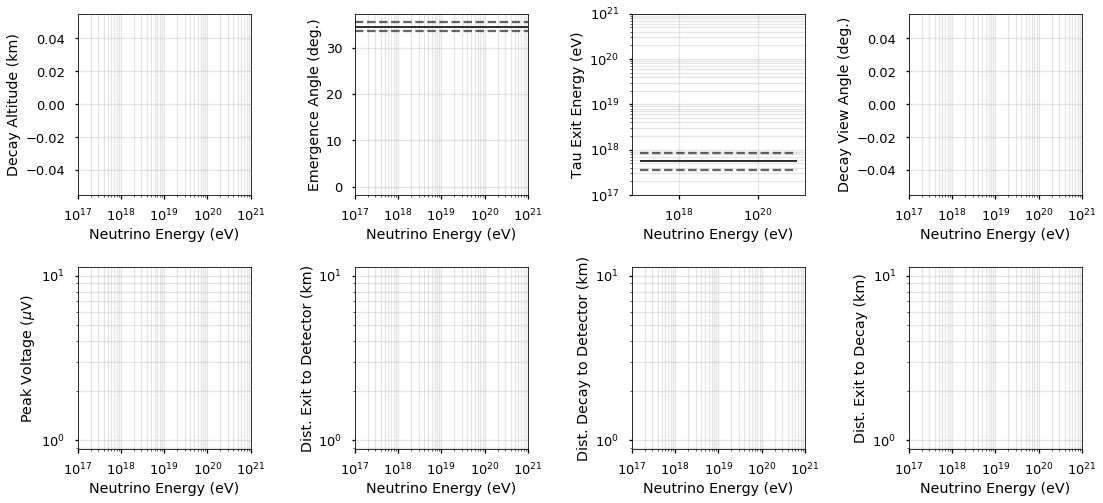

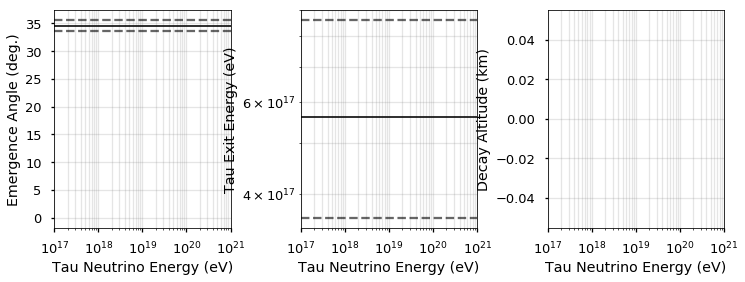

In [55]:
cross = 'mid'
eloss = 'std'
ice_thick=2.0
plot_triggered_events_energy(ice_thick=ice_thick,dirc=os.environ['TAU_ACC_DET_DIR'] + "/anita/anita-3/", which='anita3')
pyp.savefig(os.environ['TAU_DIR'] + "/plots/anita3_triggered_%dkm_altitude_%1.1fkm_ice_%sCS_%sEL.pdf"%(altitude, ice_thick, cross, eloss),
           bbox_inches='tight')

/u/project/bern/swissel/nutau/det_files/anita/anita-1//detector_acceptance_altitude_37_km_2.0km_ice_midCS_stdEL_1e+21_eV_180-1200MHz_10.0dBi_1.0antennas.npz 2548.34517006 9.88949931642 6.75053027563 0.133768808032 21.0 1 21 1e+21
/u/project/bern/swissel/nutau/det_files/anita/anita-3/detector_acceptance_altitude_37_km_2.0km_ice_midCS_stdEL_1e+21_eV_180-1200MHz_10.0dBi_1.0antennas.npz 2548.34517006 9.88949931642 6.76179406266 0.188042495788 21.0 1 21 1e+21


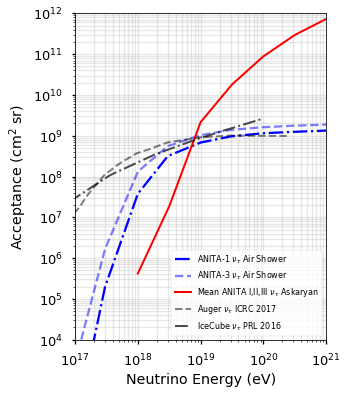

In [18]:
altitude = 37
ice_thick = 2
pyp.figure(figsize=(4.5,6))
#plot_acceptance(altitude, ice_thick, 300, 400, 10, 1, 0, label="0-km Decay Parameterization", color='b', linestyle='-')
#plot_acceptance(altitude, ice_thick, 300, 400, 10, 1, 5, label="5-km Decay Parameterization", color='r', linestyle='-')
#plot_acceptance_multiparm2d(altitude, 4, 300, 400, 10, 1, 5, label="Ice 4 km", linestyle='-',
#                           dirc = "/anita/decay_zenith_parm_6356p7523/")
#plot_acceptance_multiparm2d(altitude, 3, 300, 400, 10, 1, 5, label="Ice 3 km", linestyle='-',
#                           dirc = "/anita/decay_zenith_parm_6356p7523/")
#plot_acceptance_multiparm2d(altitude, 2, 300, 400, 10, 1, 5, label="Ice 2 km", linestyle='-',
#                           dirc = "/anita/decay_zenith_parm_6356p7523/")
#plot_acceptance_multiparm2d(altitude, 1, 300, 400, 10, 1, 5, label="Ice 1 km", linestyle='-',
#                           dirc = "/anita/decay_zenith_parm_6356p7523/")
#plot_acceptance_multiparm2d(altitude, 0, 300, 400, 10, 1, 5, label="Ice 0 km", linestyle='-',
#                          dirc = "/anita/decay_zenith_parm_6356p7523/")
en1, acc1 = plot_acceptance_multiparm2d(altitude, ice_thick, 180, 1020, 10, 1, 5, label=r"ANITA-1 $\nu_\tau$ Air Shower", color='b', linestyle='-.',
                           dirc = "/anita/anita-1/")
#en3, acc3 = plot_acceptance_multiparm2d(altitude, ice_thick, 300, 400, 10, 1, 5, label=r"ANITA-3 $\nu_\tau$ Air Shower", color='b', linestyle='--',alpha=0.5,
#                           dirc = "/anita/anita-3", a3phimasking=True)
en3, acc3 = plot_acceptance_multiparm2d(altitude, ice_thick, 180, 1020, 10, 1, 5, label=r"ANITA-3 $\nu_\tau$ Air Shower", color='b', linestyle='--',alpha=0.5,
                           dirc = "/anita/anita-3", a3phimasking=False)
                            
plot_anita_askaryan(color='red', linewidth=2)
plot_auger_acceptance_icrc2017(color='black', alpha=0.5, linestyle='--', linewidth=2)
plot_icecube_acceptance(color='black', alpha=0.7, linestyle='-.', linewidth=2)

leg = pyp.legend(loc='lower right', fontsize=8)
pyp.grid(True, which='both', alpha=0.3)
pyp.xlabel(r"Neutrino Energy (eV)")
#if( (i_f_Lo)%5==0):
pyp.ylabel("Acceptance (cm$^2$ sr)")
#if( i_f_Lo == 0):
#leg = pyp.legend(loc='upper left')
pyp.setp(leg.get_title(),fontsize=2)
#pyp.title("%d km Detector Elevation, %1.1f km ice thickness"%(altitude, ice_thick))
pyp.ylim(1e4, 1e12)
pyp.xlim(1e17,1e21)

#pyp.ylim(6e8,3e9)

#pyp.savefig(os.environ['TAU_DIR'] + "/plots/anita13_acceptance_phimasking_%dkm_altitude_%1.1fkm_ice.pdf"%(altitude, ice_thick),
#            bbox_inches='tight')
pyp.savefig(os.environ['TAU_DIR'] + "/plots/anita13_acceptance_%dkm_altitude_%1.1fkm_ice.pdf"%(altitude, ice_thick),
            bbox_inches='tight')

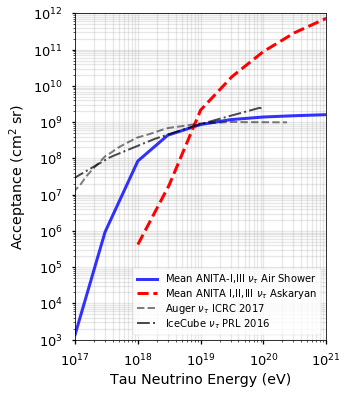

In [19]:
pyp.figure(figsize=(4.5,6))

pyp.loglog(en1, (acc1+acc3)/2, color='blue', linestyle='-',linewidth=3, alpha=0.8, label=r"Mean ANITA-I,III $\nu_\tau$ Air Shower")
plot_anita_askaryan(color='red', linestyle='--', linewidth=3)
plot_auger_acceptance_icrc2017(color='black', alpha=0.5, linestyle='--', linewidth=2)
plot_icecube_acceptance(color='black', alpha=0.7, linestyle='-.', linewidth=2)

leg = pyp.legend(loc='lower right', fontsize=10,labelspacing=0.1 )
pyp.grid(True, which='both', alpha=0.3)
pyp.xlabel(r"Tau Neutrino Energy (eV)")
#if( (i_f_Lo)%5==0):
pyp.ylabel("Acceptance (cm$^2$ sr)")
#if( i_f_Lo == 0):
#leg = pyp.legend(loc='upper left')
pyp.setp(leg.get_title(),fontsize=2)
#pyp.title("%d km Detector Elevation, %1.1f km ice thickness"%(altitude, ice_thick))
pyp.ylim(1e3, 1e12)
pyp.xlim(1e17,1e21)

#pyp.ylim(6e8,3e9)

pyp.savefig(os.environ['TAU_DIR'] + "/plots/anita13_combinedacceptance_%dkm_altitude_%1.1fkm_ice.pdf"%(altitude, ice_thick),
            bbox_inches='tight')
#pyp.savefig(os.environ['TAU_DIR'] + "/plots/anita13_combinedacceptance_phimasking_%dkm_altitude_%1.1fkm_ice.pdf"%(altitude, ice_thick),
#            bbox_inches='tight')

/u/project/bern/swissel/nutau/det_files/anita/anita-1//detector_acceptance_altitude_37_km_4.0km_ice_midCS_stdEL_3e+19_eV_180-1200MHz_10.0dBi_1.0antennas.npz
/u/project/bern/swissel/nutau/det_files/anita/anita-1//detector_acceptance_altitude_37_km_4.0km_ice_midCS_stdEL_3e+19_eV_180-1200MHz_10.0dBi_1.0antennas_events.npz
/u/project/bern/swissel/nutau/det_files/anita/backup/anita-1/detector_acceptance_altitude_37_km_4.0km_ice_midCS_stdEL_3e+19_eV_180-1200MHz_10.0dBi_1.0antennas.npz
/u/project/bern/swissel/nutau/det_files/anita/backup/anita-1/detector_acceptance_altitude_37_km_4.0km_ice_midCS_stdEL_3e+19_eV_180-1200MHz_10.0dBi_1.0antennas_events.npz


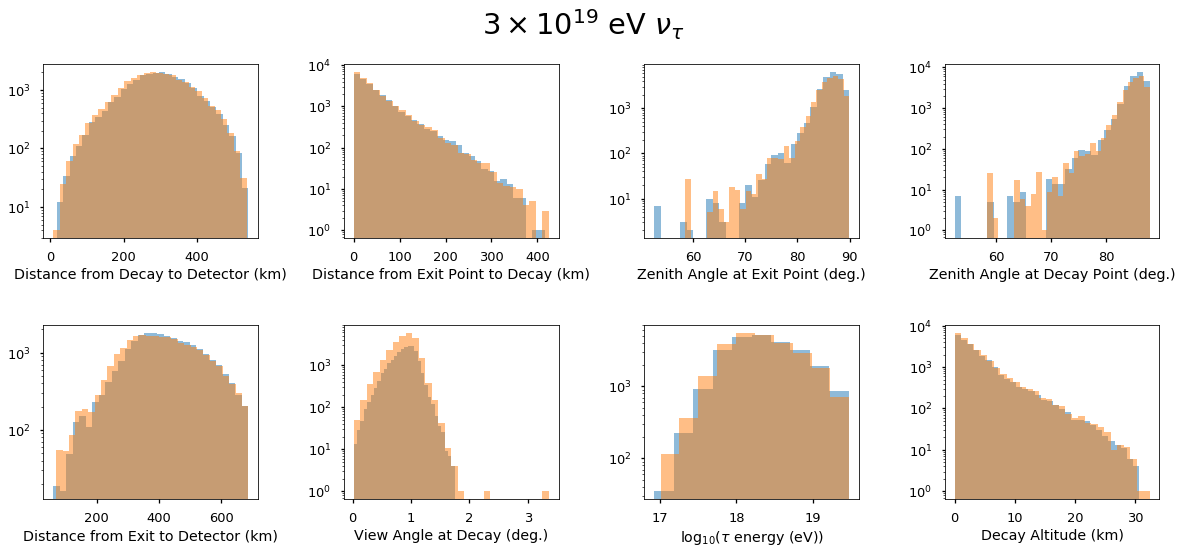

In [58]:
altitude = 37
pyp.figure(figsize=(20,8))
pyp.suptitle(r"$3\times10^{19}$ eV $\nu_{\tau}$")

plot_triggered_events(altitude = 37,ice_thick=4, en1 = 3, en2 = 19, f_Lo = 180, f_High= 1200, 
                      gain = 10, nphased = 1,
                          dirc=os.environ['TAU_ACC_DET_DIR'] + "/anita/anita-1/")
plot_triggered_events(altitude = 37,ice_thick=4, en1 = 3, en2 = 19, f_Lo = 180, f_High= 1200, 
                      gain = 10, nphased = 1,
                          dirc=os.environ['TAU_ACC_DET_DIR'] + "/anita/backup/anita-1")

In [59]:
def grid(x, y , resX=100, resY=100):
    print min(x), max(x), resX
    xi = np.linspace(min(x), max(x), resX)
    yi = np.linspace(min(y), max(y), resY)
    X,Y = np.meshgrid(xi,yi)
    return X, Y

def density_plot(x,y,nbins):
    k = kde.gaussian_kde([x,y])
    xi,yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    pyp.pcolormesh(xi,yi,zi.reshape(xi.shape))

def plot_triggered_events_correlations(altitude = 37,ice_thick=3, en1 = 3, en2 = 17, f_Lo = 180, f_High= 1200, 
                      gain = 10, nphased = 1,
                          dirc=os.environ['TAU_ACC_DET_DIR'] + "/anita/anita-1/", suffix=''):
    
    A_Omega_start, A_Omega_exit, A_Omega_range, A_Omega_trig, triggered_events,N_events_start,\
            log10_tau_energy, dist_exit_to_detector, X0_dist, dist_decay_to_detector,\
            Peak_Voltage, exit_view_angle, decay_view_angle, zenith_angle, \
            zenith_angle_decay, decay_altitude\
        = load_event_arrays(altitude, ice_thick,en1=en1, en2=en2, f_Lo=f_Lo, f_High=f_High, gain=10, nphased=1, dirc=dirc)
    emergence_angle = 90-zenith_angle
    
    pyp.figure(1)        
    pyp.subplot(2,1,1)
    pyp.plot( 90-zenith_angle,log10_tau_energy,'.', label=r'$%d \times 10^{%d}$ eV%s'%(en1, en2, suffix),alpha=0.5)
    pyp.xlabel("Emergence angle at the exit point (deg)")
    pyp.ylabel("log(Exiting Tau Energy/eV)")
    pyp.subplots_adjust(hspace=0.5, wspace=0.4)
    
    #EA, LET = grid(emergence_angle, log10_tau_energy)
    #pyp.contour(EA, LET)
    
    pyp.subplot(2,1,2)
    pyp.plot( 90-zenith_angle,dist_decay_to_detector,'.', label=r'$%d \times 10^{%d}$ eV%s'%(en1, en2, suffix),alpha=0.5)
    pyp.xlabel("Emergence angle at the exit point (deg)")
    pyp.ylabel("Dist. Decay to Detector (km)")
    pyp.subplots_adjust(hspace=0.5, wspace=0.4)
    
    pyp.figure(2)
    #data = np.vstack([log10_tau_energy, dist_exit_to_detector, X0_dist, dist_decay_to_detector, emergence_angle, decay_altitude]).T
    #figure = corner.corner(data,  labels=[r'log$_{10}$(Tau Exit Energy (eV))',  r'$\chi_{exit} (km)$', r'$\chi_{0} (km)$', 
    #                                  r'$\chi_{decay} (km)$', r'$\theta_{emerge}$(deg.)','Decay Altitude (km)'])
    
    density_plot(emergence_angle, log10_tau_energy, 30)

In [60]:
altitude = 37
pyp.figure(figsize=(10,12))
pyp.suptitle(r"$3\times10^{19}$ eV $\nu_{\tau}$")

plot_triggered_events_correlations(altitude = 37,ice_thick=4, en1 = 3, en2 = 19, f_Lo = 180, f_High= 1200, 
                      gain = 10, nphased = 1,
                          dirc=os.environ['TAU_ACC_DET_DIR'] + "/anita/decay_zenith_parm_6356p7523/")


/u/project/bern/swissel/nutau/det_files/anita/decay_zenith_parm_6356p7523//detector_acceptance_altitude_37_km_4.0km_ice_midCS_stdEL_3e+19_eV_180-1200MHz_10.0dBi_1.0antennas.npz
/u/project/bern/swissel/nutau/det_files/anita/decay_zenith_parm_6356p7523//detector_acceptance_altitude_37_km_4.0km_ice_midCS_stdEL_3e+19_eV_180-1200MHz_10.0dBi_1.0antennas_events.npz


IndexError: index 10 is out of bounds for axis 1 with size 10

In [ ]:
plot_triggered_events_correlations(altitude = 37,ice_thick=4, en1 = 3, en2 = 19, f_Lo = 180, f_High= 1200, 
                      gain = 10, nphased = 1,
                          dirc=os.environ['TAU_ACC_DET_DIR'] + "/anita/backup/decay_zenith_parm_6356p7523/")


In [ ]:
altitude = 37
ice_thick=4
en1 = 3
en2 = 19
f_Lo = 180
f_High= 1200
gain = 10 
nphased = 1
cross = 'low'
eloss = 'std'
dirc=os.environ['TAU_ACC_DET_DIR'] + "/anita/anita-1/"

A_Omega_start, A_Omega_exit, A_Omega_range, A_Omega_trig, N_events_start,triggered_events,\
            log10_tau_energy, dist_exit_to_detector, X0_dist, dist_decay_to_detector,\
            Peak_Voltage, exit_view_angle, decay_view_angle, zenith_angle, \
            zenith_angle_decay, decay_altitude\
        = load_event_arrays(altitude, ice_thick,en1=en1, en2=en2, f_Lo=f_Lo, 
                            f_High=f_High, gain=gain, nphased=nphased, dirc=dirc,
                           cross=cross, eloss=eloss)
emergence_angle = 90-zenith_angle

# apply a cut
min_angle = 3.0
max_angle = 10.
eangle_cut = np.where((emergence_angle > min_angle) & (emergence_angle < max_angle))[0]

pyp.figure(1)
pyp.hist(emergence_angle[eangle_cut], np.linspace(min_angle, max_angle, 100), alpha=0.5)

pyp.figure(2)
pyp.hist(log10_tau_energy[eangle_cut],np.linspace(16.0, 20.0, 100), alpha=0.5)

pyp.figure(3)
pyp.hist(dist_decay_to_detector[eangle_cut],np.linspace(0,500,100), alpha=0.5)

pyp.figure(4)
pyp.hist(dist_exit_to_detector[eangle_cut], np.linspace(0,500,100),alpha=0.5)

pyp.figure(5)
pyp.hist(Peak_Voltage[eangle_cut]*1e3,np.linspace(0,35,100),alpha=0.5,log=True)

print "New", A_Omega_start, A_Omega_trig,N_events_start, len(triggered_events)

##############
# July 2018 LUTs
dirc=os.environ['TAU_ACC_DET_DIR'] + "/anita/backup/anita-1/"

A_Omega_start, A_Omega_exit, A_Omega_range, A_Omega_trig, N_events_start,triggered_events,\
            log10_tau_energy, dist_exit_to_detector, X0_dist, dist_decay_to_detector,\
            Peak_Voltage, exit_view_angle, decay_view_angle, zenith_angle, \
            zenith_angle_decay, decay_altitude\
        = load_event_arrays(altitude, ice_thick,en1=en1, en2=en2, f_Lo=f_Lo, 
                            f_High=f_High, gain=gain, nphased=nphased, dirc=dirc,
                           cross=cross, eloss=eloss)
emergence_angle = 90-zenith_angle

# apply a cut
eangle_cut = np.where((emergence_angle > min_angle) & (emergence_angle < max_angle))[0]

pyp.figure(1)
pyp.hist(emergence_angle[eangle_cut],np.linspace(min_angle, max_angle, 100), alpha=0.5)

pyp.figure(2)
pyp.hist(log10_tau_energy[eangle_cut],np.linspace(16.0, 20.0, 100),alpha=0.5)

pyp.figure(3)
pyp.hist(dist_decay_to_detector[eangle_cut], np.linspace(0,500,100),alpha=0.5)

pyp.figure(4)
pyp.hist(dist_exit_to_detector[eangle_cut], np.linspace(0,500,100),alpha=0.5)

pyp.figure(5)
pyp.hist(Peak_Voltage[eangle_cut]*1e3,np.linspace(0,35,100),alpha=0.5,log=True)

print "Old", A_Omega_start, A_Omega_trig, N_events_start, len(triggered_events)

In [ ]:
altitude = 37
ice_thick=4
en1 = 3
en2 = 19
f_Lo = 180
f_High= 1200
gain = 10 
nphased = 1
cross = 'low'
eloss = 'std'
dirc=os.environ['TAU_ACC_DET_DIR'] + "/anita/anita-1/"

A_Omega_start, A_Omega_exit, A_Omega_range, A_Omega_trig, N_events_start, ranged_events,\
            log10_tau_energy, dist_exit_to_detector, X0_dist, dist_decay_to_detector,\
            Peak_Voltage, exit_view_angle, decay_view_angle, zenith_angle, \
        = load_range_arrays(altitude, ice_thick,en1=en1, en2=en2, f_Lo=f_Lo, 
                            f_High=f_High, gain=gain, nphased=nphased, dirc=dirc,
                           cross=cross, eloss=eloss)
emergence_angle = 90-zenith_angle

# apply a cut
min_angle = 0.0
max_angle = 3.
eangle_cut = np.where((emergence_angle > min_angle) & (emergence_angle < max_angle))[0]

pyp.figure(1)
pyp.hist(emergence_angle[eangle_cut], np.linspace(min_angle, max_angle, 100), alpha=0.5)

pyp.figure(2)
pyp.hist(log10_tau_energy[eangle_cut],np.linspace(16.0, 20.0, 100), alpha=0.5)

pyp.figure(3)
pyp.hist(dist_decay_to_detector[eangle_cut],np.linspace(0,500,100), alpha=0.5)

pyp.figure(4)
pyp.hist(dist_exit_to_detector[eangle_cut], np.linspace(0,500,100),alpha=0.5)
print "New", A_Omega_start, A_Omega_exit, A_Omega_range, A_Omega_trig, N_events_start, len(ranged_events)

##############
# July 2018 LUTs
dirc=os.environ['TAU_ACC_DET_DIR'] + "/anita/backup/anita-1/"

A_Omega_start, A_Omega_exit, A_Omega_range, A_Omega_trig, N_events_start, ranged_events,\
            log10_tau_energy, dist_exit_to_detector, X0_dist, dist_decay_to_detector,\
            Peak_Voltage, exit_view_angle, decay_view_angle, zenith_angle, \
        = load_range_arrays(altitude, ice_thick,en1=en1, en2=en2, f_Lo=f_Lo, 
                            f_High=f_High, gain=gain, nphased=nphased, dirc=dirc,
                           cross=cross, eloss=eloss)
emergence_angle = 90-zenith_angle

# apply a cut
eangle_cut = np.where((emergence_angle > min_angle) & (emergence_angle < max_angle))[0]

pyp.figure(1)
pyp.hist(emergence_angle[eangle_cut],np.linspace(min_angle, max_angle, 100), alpha=0.5, log=True)

pyp.figure(2)
pyp.hist(log10_tau_energy[eangle_cut],np.linspace(16.0, 20.0, 100),alpha=0.5, log=True)

pyp.figure(3)
pyp.hist(dist_decay_to_detector[eangle_cut], np.linspace(0,500,100),alpha=0.5, log=True)

pyp.figure(4)
pyp.hist(dist_exit_to_detector[eangle_cut], np.linspace(0,500,100),alpha=0.5, log=True)

print "Old", A_Omega_start, A_Omega_exit, A_Omega_range, A_Omega_trig, N_events_start, len(ranged_events)